In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px
import os

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pepeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pepeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pepeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv('UpdatedResumeDataSet.csv', encoding="utf-8")
print(data.shape)
data.describe()

(14782, 7)


,length,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,14751.000000,0.0,0.0,0.0,0.0
mean,6308.194834,NaN,NaN,NaN,NaN
std,5218.753940,NaN,NaN,NaN,NaN
min,10.000000,NaN,NaN,NaN,NaN
25%,2654.000000,NaN,NaN,NaN,NaN
50%,4541.000000,NaN,NaN,NaN,NaN
75%,8252.000000,NaN,NaN,NaN,NaN
max,31525.000000,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14782 entries, 0 to 14781
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    14782 non-null  object 
 1   Resume      14781 non-null  object 
 2   length      14751 non-null  float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 808.5+ KB


In [5]:

#Revisar nulos
data[data.isna().any(axis=1) | data.isnull().any(axis=1)]

,Category,Resume,length,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Automation Testing,Education Details B Tech Electronics And Instr...,4484.0,NaN,NaN,NaN,NaN
1,Automation Testing,SKILLS Agile Methodology Scrum Kanban Extreme ...,6325.0,NaN,NaN,NaN,NaN
2,Automation Testing,Technical Skills Summary I have completed CORP...,2187.0,NaN,NaN,NaN,NaN
3,Automation Testing,SKILLS Agile Methodology Scrum Kanban Extreme ...,6325.0,NaN,NaN,NaN,NaN
4,Automation Testing,TECHNICAL SKILLS Automation Testing Selenium W...,3941.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
14777,Web Developer,Software Engineer span lSoftwarespan Engineer ...,4955.0,NaN,NaN,NaN,NaN
14778,Web Developer,Sr Systems Manager Sr Business Manager Sr span...,4703.0,NaN,NaN,NaN,NaN
14779,Web Developer,Full Stack NET Developer Full Stack NET span l...,20449.0,NaN,NaN,NaN,NaN
14780,Web Developer,Director of Information Systems Director of In...,13599.0,NaN,NaN,NaN,NaN


In [6]:
data.nunique()

Category         34
Resume        14315
length         8746
Unnamed: 3        0
Unnamed: 4        0
Unnamed: 5        0
Unnamed: 6        0
dtype: int64

In [7]:
valores_unicos = data.Category.unique()
valores_unicos

array(['Automation Testing ', 'Blockchain ', 'Data Science ', 'Database ',
       'Designer ', 'DevOps Engineer ', 'DotNet Developer ',
       'ETL Developer ', 'Information Technology ', 'Java Developer ',
       'Science and Engineering University of Delaware',
       'y Reviewed and validated all project deliverable risk factors across all impacting projects to ensure minimum impact to timelines cost and scope Project types inclusive of Infrastructure and HRPayrollBenefits SELECTED ACCOMPLISHMENTS Analyzed the costeffectiveness and compared the overall feasibility of setting up an offshore versus an inhouse quality assurance team for development and testing initiatives Responsible for the development and management of budgets determine project scope liaison between line of businesstechnology teams and ensured all objectives were met ontime and within budget tracking to a 3 variance ratio with a success rate of 98 Performed budgeting risk factor scenarios in order to preempt the poss

In [8]:
data = data[data['Category'].apply(lambda x: len(x.split()) <= 5)]

In [9]:
valores_a_eliminar = [
    'Automation Testing ',
    'Designer ',
    'ETL Developer ',
    'Information Technology ',
    'Project manager ',
    'SAP Developer ',
    'Security Analyst ',
    'Web Developer '
]

'''valores_a_eliminar = [
    'HR',
    'Advocate',
    'Arts',
    'Business Analyst',
    'SAP Developer',
    'Automation Testing',
    'Electrical Engineering',
    'Operations Manager',
    'PMO',
    'Hadoop',
    'ETL Developer',
    'Mechanical Engineer',
    'Sales',
    'Health and fitness',
    'Civil Engineer',
    'ETL Developer'
]'''

df = data[~data['Category'].isin(valores_a_eliminar)]

In [10]:
#imprimimos las etiquetas nuevas que quedaron
df['Category'] = df['Category'].str.rstrip()

valores_unicos = df.Category.unique()
valores_unicos

array(['Blockchain', 'Data Science', 'Database', 'DevOps Engineer',
       'DotNet Developer', 'Java Developer', 'Network Security Engineer',
       'Python Developer', 'Testing', 'Web Designing'], dtype=object)

In [11]:
df.nunique()

Category        10
Resume        4804
length        3943
Unnamed: 3       0
Unnamed: 4       0
Unnamed: 5       0
Unnamed: 6       0
dtype: int64

In [12]:
df['Category'].value_counts()

Category
Java Developer               2502
Python Developer             2359
Testing                        70
DevOps Engineer                55
Web Designing                  45
Blockchain                     40
Data Science                   40
Database                       33
DotNet Developer               28
Network Security Engineer      25
Name: count, dtype: int64

In [13]:
# Reemplaza 'instruccion' con el nombre de tu columna
# Reemplaza 'etiqueta' con la etiqueta que quieres contar
#conteo_etiquetas = df['instruction'].value_counts().get('Generate a Resume for a DotNet Developer Job', 0)

#print(f"La etiqueta aparece {conteo_etiquetas} veces")

In [14]:
#df['instruction'] = df['instruction'].str.replace('Generate a Resume for a ', '')
#df['instruction'] = df['instruction'].str.split('Job').str[0]

#df.reset_index(drop=True, inplace=True)

#df['instruction']

In [15]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'\b\d+\b', ' ', resumeText)  # remove numbers
    resumeText = resumeText.lower() # convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(resumeText)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    resumeText = ' '.join(filtered_text)

    # Lemmatize
    tokens = word_tokenize(resumeText)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    resumeText = ' '.join(lemmatized_tokens)

    return resumeText

def clean_ussles_words(resumen, categoria):
    # Convertimos la categoría a minúsculas para asegurar la correspondencia con las claves del diccionario
    palabras_irrelevantes = diccionarios.get(categoria, set())
    palabras_limpias = [palabra for palabra in resumen.split() if palabra not in palabras_irrelevantes]
    return ' '.join(palabras_limpias)


# Función para encontrar las habilidades comunes
def find_common_skills(category):
    skills = []
    for key, value in skills_dict.items():
        if key == category:
            skills = value.split(', ')
            break
    return skills



In [16]:
df['Clean_Resume'] = df["Resume"].map(cleanResume)

df['Clean_Resume'] = df['Clean_Resume'].str.replace('Â', '').str.replace('â', '')

In [17]:
# Ruta a la carpeta que contiene tus archivos de diccionarios
#EMPIEZAS DESDE AQUI PARA COMPILAR LOS CAMBIOS AL DICCIONARIO
carpeta_diccionarios = 'diccionarios'

# Cargar los diccionarios de palabras irrelevantes desde los archivos
diccionarios = {}


for archivo in os.listdir(carpeta_diccionarios):
    categoria = archivo.split('.')[0]  # Asume que el nombre del archivo es exactamente la categoría
    with open(os.path.join(carpeta_diccionarios, archivo), 'r', encoding='utf-8') as f:
        # Crea un conjunto de palabras irrelevantes para cada categoría
         # Elimina las comas de cada palabra antes de agregarlas al conjunto
         diccionarios[categoria] = set(palabra.strip().rstrip(',') for palabra in f.read().splitlines())
         


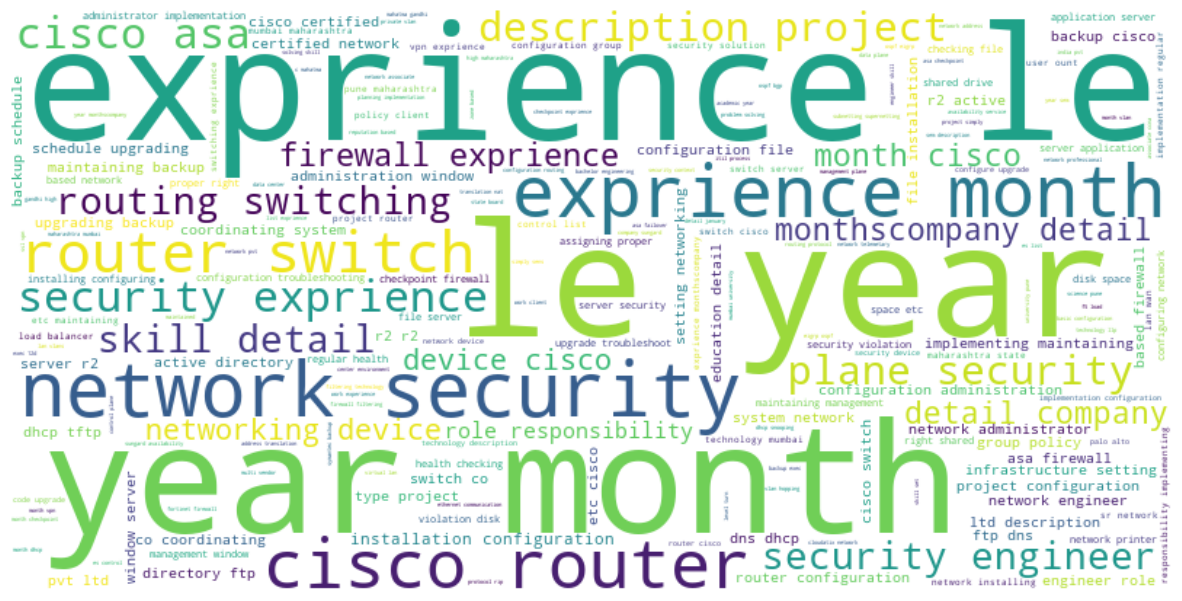

In [18]:
#NUBE ANTES DE APLICAR EL DICCIONARIO
# Filtrar los resúmenes por la etiqueta 'X'
all_resumes = df[df['Category'] == 'Network Security Engineer']['Clean_Resume']

# Combinar todos los resúmenes en una única cadena de texto
combined_resumes = ' '.join(all_resumes)

# Crear y visualizar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_resumes)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes para una visualización más limpia
plt.show()

In [19]:
#APLICAR DICCIONARIOS
# Aplicar la función de limpieza a cada fila del DataFrame
df['Clean_Resume'] = df.apply(lambda fila: clean_ussles_words(fila['Clean_Resume'], fila['Category']), axis=1)# revisar si se aplicaron lso diccionarios

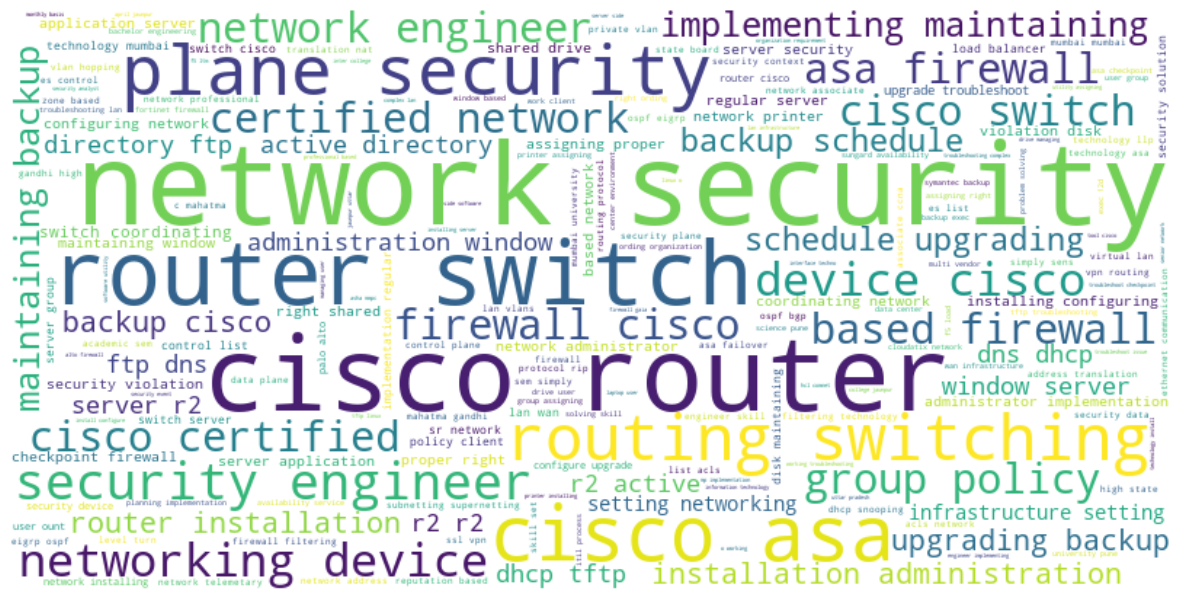

In [20]:
#NUBE DESPUES DE APLICAR EL DICCIONARIO
# Filtrar los resúmenes por la etiqueta 'X'
all_resumes = df[df['Category'] == 'Network Security Engineer']['Clean_Resume']

# Combinar todos los resúmenes en una única cadena de texto
combined_resumes = ' '.join(all_resumes)

# Crear y visualizar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_resumes)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes para una visualización más limpia
plt.show()

In [21]:
skills_dict = {
    'Blockchain': 'Ethereum Smart Contracts, Cryptography, Solidity, DApp Development, Hyperledger Fabric, Consensus Algorithms, Node.js, Corda, Blockchain System Design, Truffle, Ganache, Blockchain API, Ripple, Litecoin, Bitcoin, Blockchain Security, Key Management, DeFi, NFTs',
    'Data Science': 'Python, R, Machine Learning, Deep Learning, Statistical Analysis, pandas, NumPy, Data Visualization, Matplotlib, Seaborn, SQL, NoSQL, Spark, Hadoop, PySpark, Ensemble Models, PCA, t-SNE, Airflow, Keras, TensorFlow, Time Series, Predictive Analysis, A/B Testing',
    'Database': 'SQL, PL/SQL, Database Administration, MySQL, PostgreSQL, Oracle, MongoDB, Cassandra, Database Design, Normalization, Data Recovery, Query Optimization, Distributed Databases, Database Tuning, Replication, Sharding, Cluster Management, ETL, Data Warehousing, Real-time DB, Redis, Database Security, Compliance',
    'DevOps Engineer': 'CI/CD, Jenkins, GitLab CI, Docker, Kubernetes, Ansible, Terraform, Monitoring, Logging, Prometheus, Grafana, ELK, Unix Administration, Bash, Python, CloudFormation, Spinnaker, Secrets Management, Ruby, Perl, Vagrant',
    'DotNet Developer': 'C#, .NET Framework, ASP.NET MVC, Entity Framework, LINQ, Azure, WPF, Windows Forms, RESTful APIs, .NET Core, Microservices, SignalR, RabbitMQ, CI/CD, TeamCity, Xamarin, Stress Testing',
    'Java Developer': 'Java, Spring Framework, Spring Boot, Hibernate, JPA, Maven, Gradle, SOAP, REST, JUnit, Design Patterns, Jersey, Netflix OSS, Spring Security, Android Development, SQL, NoSQL Integration, JVM Optimization',
    'Network Security Engineer': 'Firewalls, VPNs, IDS/IPS, SSL/TLS, SSH, Vulnerability Assessment, Pentesting, Intrusion Detection, ISO 27001, NIST, Cryptography, SIEMs, Digital Forensics, Firewall Configuration, Network Security Policies, DLP, CISSP, CISM',
    'Python Developer': 'Python, Django, Flask, Scripting, Data Analysis, Pandas, NumPy, Web Scraping, BeautifulSoup, Scrapy, API Development, FastAPI, Django REST, pytest, unittest, Pyramid, Bottle, asyncio, ORM, SQLAlchemy, Packaging, Kafka, RabbitMQ',
    'Testing': 'HTML, CSS, JavaScript, UX, UI, Frameworks, Graphic Design, Photoshop, Illustrator, Logo Design, Prototyping, Accessibility, SEO, Management, Test Animation, Optimization, Security, Responsive Design',
    'Web Designing': 'HTML, CSS, JavaScript, Responsive Design, UX, UI, Bootstrap, Foundation, Graphic Design, Photoshop, Illustrator, Logo Design, Prototyping, Accessibility, SEO, WordPress, Git, Web Animation, Debugging, Performance Optimization, Web Security'
}


In [22]:
# Agregar la columna de habilidades comunes
df['Common Skills'] = df['Category'].apply(find_common_skills)

#hacer todo minusculas
df["Common Skills"] = [
    [palabra.lower() for palabra in lista] for lista in df["Common Skills"]
]

In [23]:
df["Common Skills"] = df["Common Skills"].str.join(" ")

print(df["Common Skills"])

26       ethereum smart contracts cryptography solidity...
27       ethereum smart contracts cryptography solidity...
28       ethereum smart contracts cryptography solidity...
29       ethereum smart contracts cryptography solidity...
30       ethereum smart contracts cryptography solidity...
                               ...                        
11309    html css javascript responsive design ux ui bo...
11310    html css javascript responsive design ux ui bo...
11311    html css javascript responsive design ux ui bo...
11312    html css javascript responsive design ux ui bo...
11313    html css javascript responsive design ux ui bo...
Name: Common Skills, Length: 5197, dtype: object


In [24]:
#eliminar valores
#valores_a_eliminar = ["Java Developer","Python Developer"]
#resumeDataSet = df[~df['Category'].isin(valores_a_eliminar)]

In [25]:
# Mantén solo las columnas que deseas, eliminando el resto
df = df[['Category', 'Clean_Resume', 'Common Skills']]

In [26]:
#df.to_csv("Dataset_part_pp.csv", index=False) #Cambiar a pp o jeremy depediendo el datset de entrada
#analizar el otro datset en las nubees